# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Loading Dataset

In [2]:
df = pd.read_csv(r'D:\Programacion\Datasets\retail_transaction\Retail_Transaction_Dataset.csv')

In [120]:
df

,ProductID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount
0,C,7,80.079844,2023-12-26,Cash,Books,18.677100,455.862764
1,C,4,75.195229,2023-08-05,Cash,Home Decor,14.121365,258.306546
2,A,8,31.528816,2024-03-11,Cash,Books,15.943701,212.015651
3,D,5,98.880218,2023-10-27,PayPal,Books,6.686337,461.343769
4,A,7,93.188512,2023-12-22,Cash,Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...
99995,A,2,56.078258,2023-07-17,Credit Card,Clothing,18.345145,91.581240
99996,A,6,88.516406,2023-05-30,Credit Card,Electronics,3.995541,509.878179
99997,B,4,72.385564,2023-08-25,Credit Card,Clothing,17.423979,239.092472
99998,C,5,66.542239,2024-02-05,PayPal,Electronics,14.345018,284.983717


In [3]:
df.drop(['CustomerID','StoreLocation'],axis=1,inplace=True)

In [4]:
df['TransactionDate'] = df.TransactionDate.str.split().str[0]

In [93]:
df.describe()

,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.009290,55.067344,10.020155,248.334955
std,2.579808,25.971567,5.779534,184.554792
min,1.000000,10.000430,0.000046,8.274825
25%,3.000000,32.549474,5.001013,95.163418
50%,5.000000,55.116789,10.030353,200.368393
75%,7.000000,77.456763,15.018367,362.009980
max,9.000000,99.999284,19.999585,896.141242


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ProductID           100000 non-null  object 
 1   Quantity            100000 non-null  int64  
 2   Price               100000 non-null  float64
 3   TransactionDate     100000 non-null  object 
 4   PaymentMethod       100000 non-null  object 
 5   ProductCategory     100000 non-null  object 
 6   DiscountApplied(%)  100000 non-null  float64
 7   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB


# Cleaning Data

In [8]:
#Duplicated
df.duplicated().sum()

0

In [57]:
# Invalid Values
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(),end='\n\n')

ProductID
C    25209
D    25042
B    24997
A    24752
Name: count, dtype: int64

TransactionDate
12/1/2023     330
7/8/2023      319
9/6/2023      316
11/5/2023     316
1/13/2024     311
             ... 
7/24/2023     230
9/23/2023     228
10/17/2023    228
11/24/2023    220
4/29/2023      14
Name: count, Length: 366, dtype: int64

PaymentMethod
PayPal         25067
Credit Card    25034
Cash           25008
Debit Card     24891
Name: count, dtype: int64

ProductCategory
Clothing       25056
Books          25031
Electronics    24990
Home Decor     24923
Name: count, dtype: int64



In [5]:
df['TransactionDate'] = pd.to_datetime(df.TransactionDate)
df['TransactionDate'] = pd.to_datetime(df.TransactionDate.dt.strftime('%d/%m/%Y'),dayfirst=True)

In [61]:
#Missing Values
df.isna().sum()

ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

# EDA

Text(0.5, 0.98, 'Relaciones de los Productos')

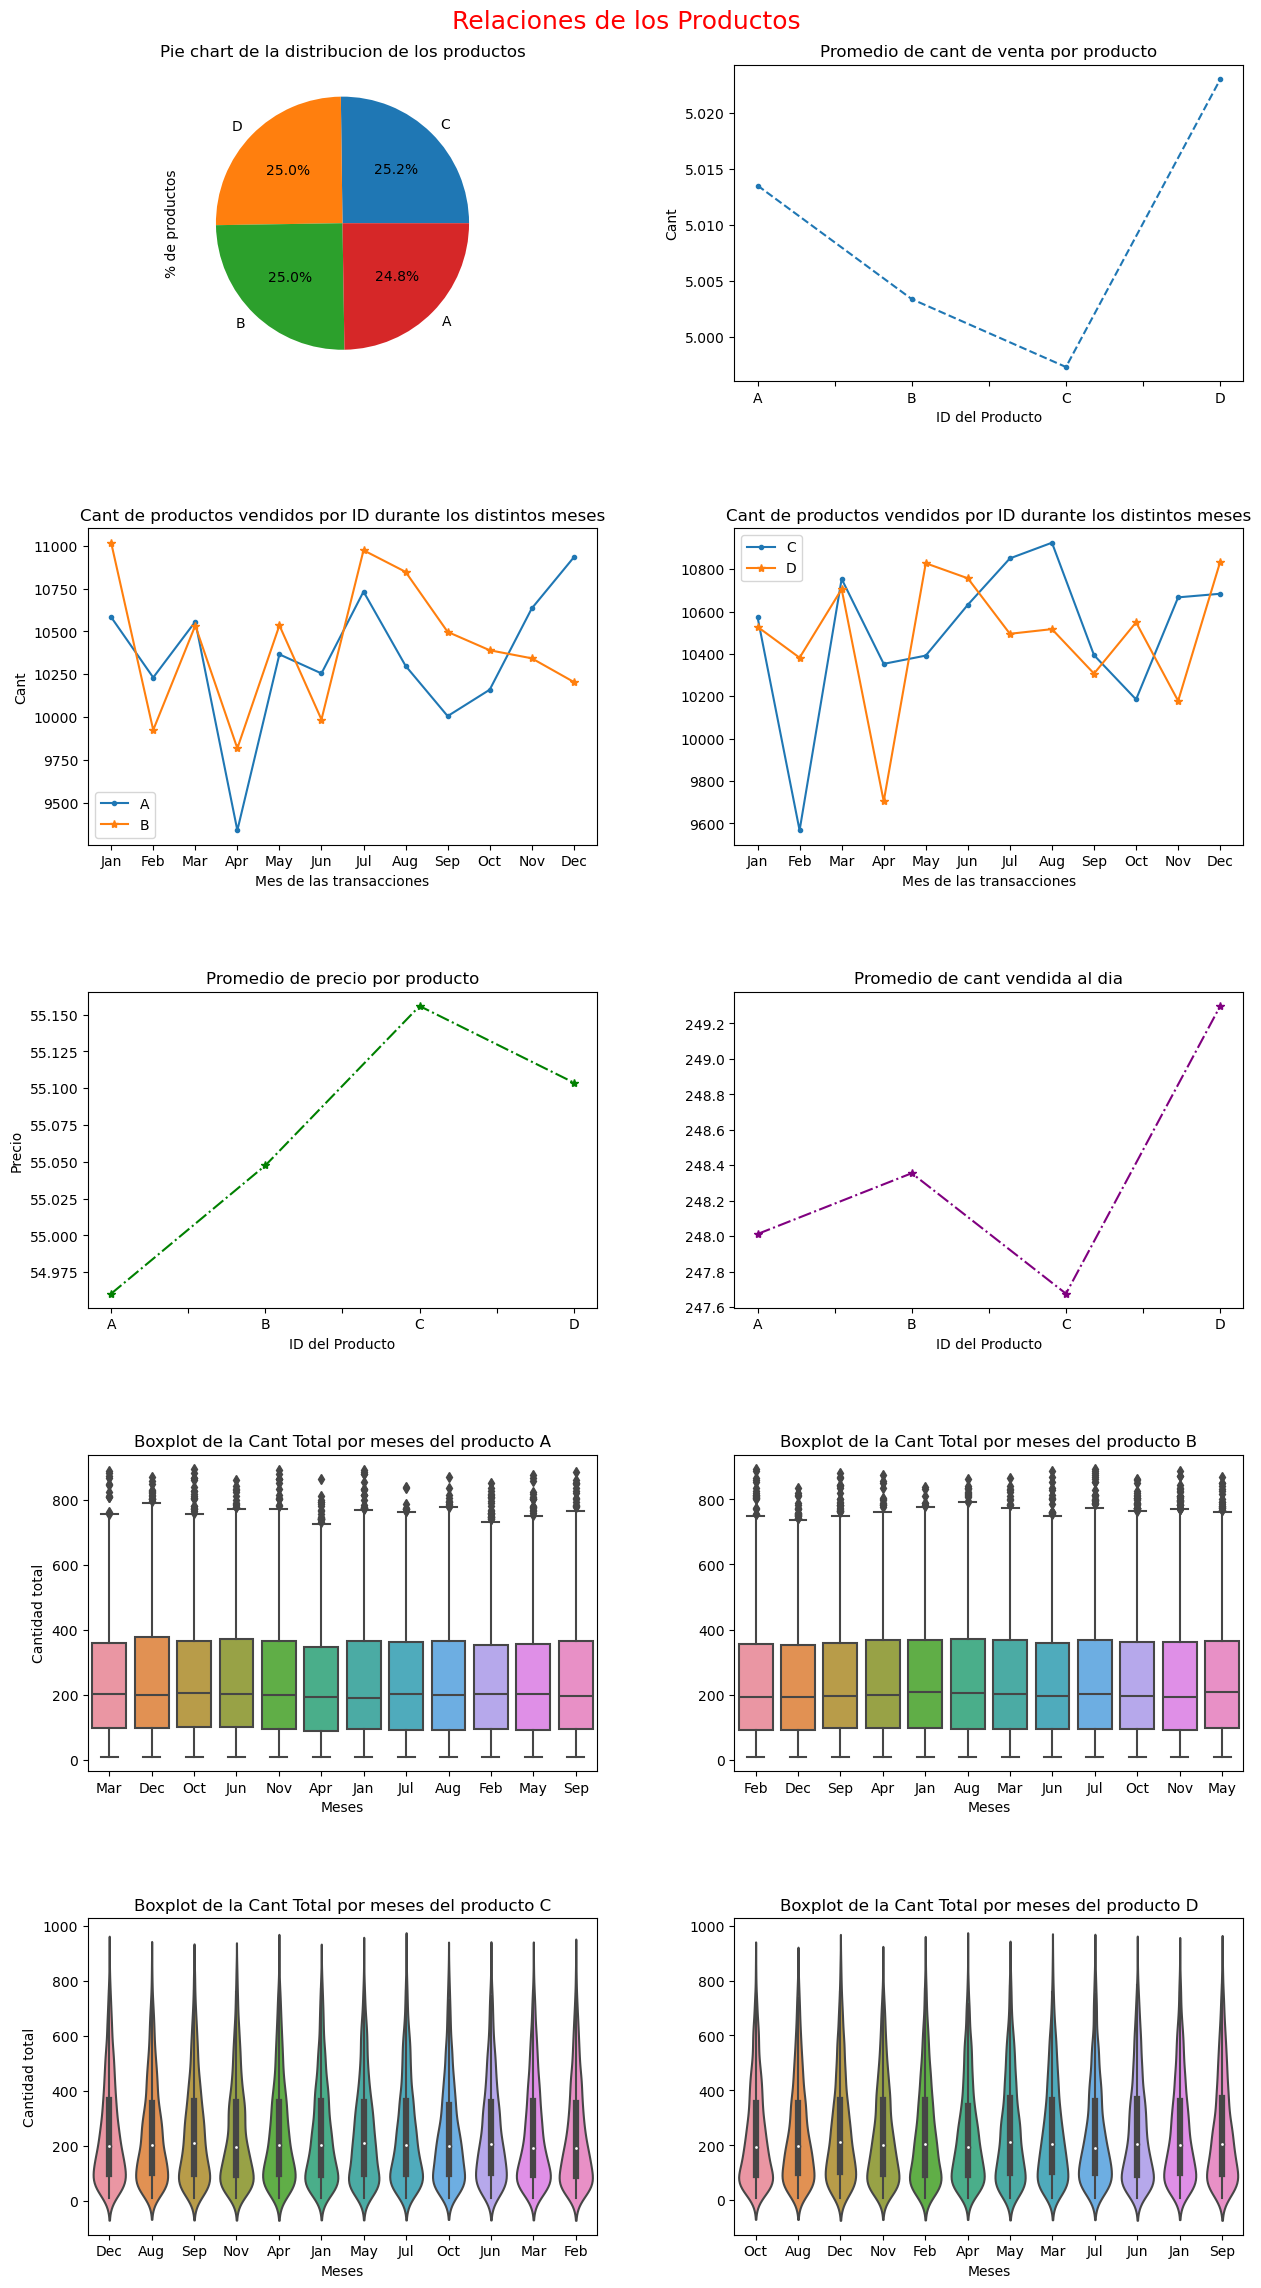

In [208]:
#ProductID
fig,ax = plt.subplots(5,2,figsize=(14,24))

df.ProductID.value_counts().plot.pie(ax=ax[0,0],label='% de productos',
                                     autopct='%1.1f%%',
                                     title='Pie chart de la distribucion de los productos')

df.groupby('ProductID')['Quantity'].mean().plot(marker='.',
                                                ls='dashed',
                                                xlabel='ID del Producto',
                                                ylabel='Cant',
                                                title='Promedio de cant de venta por producto',ax=ax[0,1])

a_id = df.loc[df.ProductID=='A'].groupby(df.TransactionDate.dt.month)['Quantity'].sum()
a_id.index = pd.to_datetime(a_id.index,format='%m').strftime('%b')
b_id = df.loc[df.ProductID=='B'].groupby(df.TransactionDate.dt.month)['Quantity'].sum()
b_id.index = pd.to_datetime(b_id.index,format='%m').strftime('%b')
a_id.plot(label='A',marker='.',ax=ax[1,0])
b_id.plot(label='B',marker='*',ax=ax[1,0])
ax[1,0].legend()
ax[1,0].set_xlabel('Mes de las transacciones')
ax[1,0].set_ylabel('Cant')
ax[1,0].set_title('Cant de productos vendidos por ID durante los distintos meses')
ax[1,0].set_xticks(range(12),a_id.index)

c_id = df.loc[df.ProductID=='C'].groupby(df.TransactionDate.dt.month)['Quantity'].sum()
c_id.index = pd.to_datetime(c_id.index,format='%m').strftime('%b')
c_id.plot(label='C',marker='.',ax=ax[1,1])
d_id = df.loc[df.ProductID=='D'].groupby(df.TransactionDate.dt.month)['Quantity'].sum()
d_id.index = pd.to_datetime(d_id.index,format='%m').strftime('%b')
d_id.plot(label='D',marker='*',ax=ax[1,1])
ax[1,1].legend()
ax[1,1].set_xlabel('Mes de las transacciones')
ax[1,1].set_title('Cant de productos vendidos por ID durante los distintos meses')
ax[1,1].set_xticks(range(12),a_id.index)


df.groupby('ProductID')['Price'].mean().plot(marker='*',
                                                ls='dashdot',
                                                xlabel='ID del Producto',
                                                ylabel='Precio',
                                                color='green',
                                                title='Promedio de precio por producto',ax=ax[2,0])

df.groupby('ProductID')['TotalAmount'].mean().plot(marker='*',
                                                ls='dashdot',
                                                xlabel='ID del Producto',
                                                color='purple',
                                                title='Promedio de cant vendida al dia',ax=ax[2,1])

a_price = df.loc[df.ProductID=='A']
sns.boxplot(x=a_price.TransactionDate.dt.strftime('%b'),y=a_price.TotalAmount,ax=ax[3,0])
ax[3,0].set_xlabel('Meses')
ax[3,0].set_ylabel('Cantidad total')
ax[3,0].set_title('Boxplot de la Cant Total por meses del producto A')

b_price = df.loc[df.ProductID=='B']
sns.boxplot(x=b_price.TransactionDate.dt.strftime('%b'),y=b_price.TotalAmount,ax=ax[3,1])
ax[3,1].set_xlabel('Meses')
ax[3,1].set_ylabel('')
ax[3,1].set_title('Boxplot de la Cant Total por meses del producto B')

c_price = df.loc[df.ProductID=='C']
sns.violinplot(x=c_price.TransactionDate.dt.strftime('%b'),y=c_price.TotalAmount,ax=ax[4,0])
ax[4,0].set_xlabel('Meses')
ax[4,0].set_ylabel('Cantidad total')
ax[4,0].set_title('Boxplot de la Cant Total por meses del producto C')

d_price = df.loc[df.ProductID=='D']
sns.violinplot(x=d_price.TransactionDate.dt.strftime('%b'),y=d_price.TotalAmount,ax=ax[4,1])
ax[4,1].set_xlabel('Meses')
ax[4,1].set_ylabel('')
ax[4,1].set_title('Boxplot de la Cant Total por meses del producto D')


plt.tight_layout(pad=6)
fig.suptitle('Relaciones de los Productos',color='r',size=18)

In [211]:
sns.set_style('darkgrid')

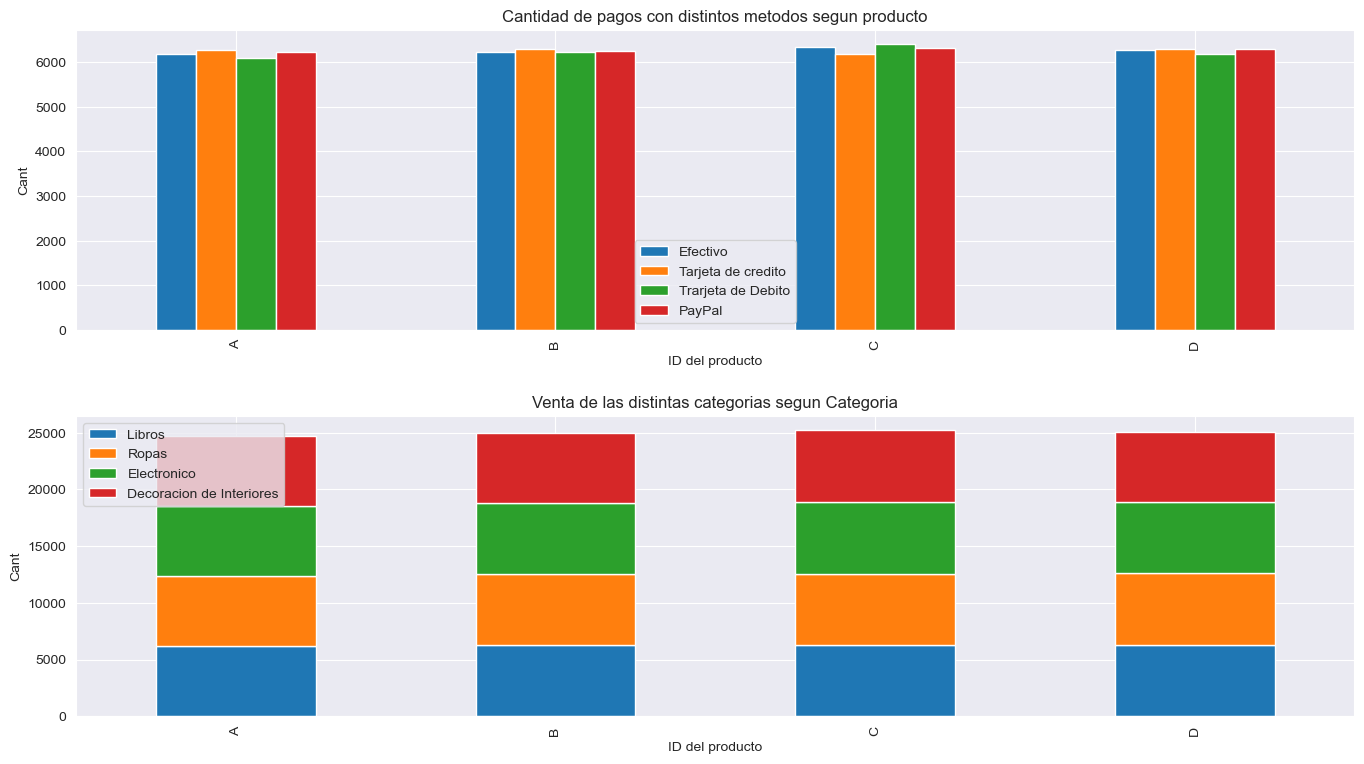

In [219]:
fig0,ax0 = plt.subplots(2,1,figsize=(14,8))

df.groupby('ProductID')['PaymentMethod'].value_counts().unstack().plot.bar(ax=ax0[0])
ax0[0].set_xlabel('ID del producto')
ax0[0].set_ylabel('Cant')
ax0[0].set_title('Cantidad de pagos con distintos metodos segun producto')
ax0[0].legend(['Efectivo','Tarjeta de credito','Trarjeta de Debito','PayPal'])

df.groupby('ProductID')['ProductCategory'].value_counts().unstack().plot.bar(ax=ax0[1],
                                                                            xlabel='ID del producto',
                                                                            ylabel='Cant',
                                                                            title='Venta de las distintas categorias segun Categoria',
                                                                            stacked=True)
ax0[1].legend(['Libros','Ropas','Electronico','Decoracion de Interiores'])

plt.tight_layout(pad=2)

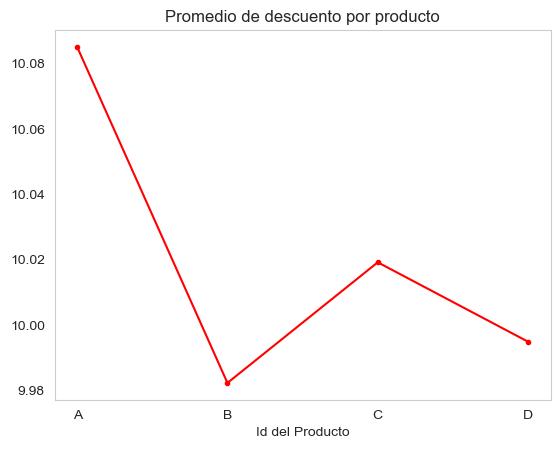

In [7]:
sns.set_style('whitegrid')
df.groupby('ProductID')['DiscountApplied(%)'].mean().plot(xlabel='Id del Producto',title='Promedio de descuento por producto',marker='.',color='r')
plt.grid('')

In [233]:
#Cantidad
print(f'Min de Cant Vendidas: {df.Quantity.min()}\nMax de Cant de Vendidas: {df.Quantity.max()}\nPromedio de Cant Vendidas: {df.Quantity.mean()}')

Min de Cant Vendidas: 1
Max de Cant de Vendidas: 9
Promedio de Cant Vendidas: 5.00929


<Axes: xlabel='Quantity', ylabel='count'>

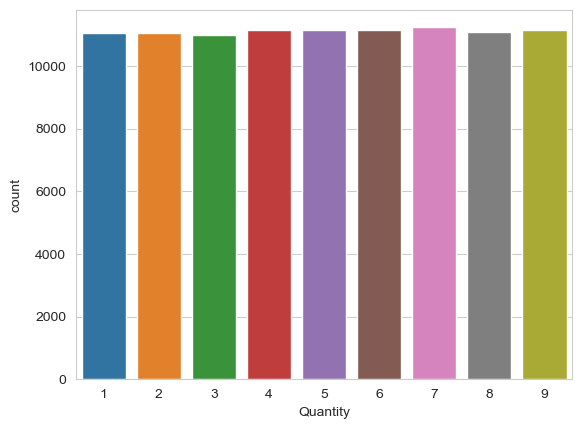

In [235]:
sns.countplot(x=df.Quantity.astype('object'))